# 🩺 시나리오 기반 미션: AI 주치의, 심장 질환을 예측하라!

당신은 대형 병원 AI 개발팀의 주니어 엔지니어입니다. 병원에서는 **의료진의 판단을 돕는 ‘심장 질환 예측 보조 시스템’**을 개발하려 합니다.

현재 환자 진료 데이터를 바탕으로 다음을 수행해야 합니다.

---

## ✅ 실습 목표

- 다양한 전처리 전략을 통해 모델 성능을 향상
- SVM과 다른 모델을 앙상블하여 실제 의료 현장에 적합한 높은 정확도 확보
- 환자에게 “이 사람은 심장병일 가능성이 얼마나 높은가?”를 확률적으로 설명할 수 있는 모델 개발

---

## 📝 문제

### 🚩 Q1. 데이터 탐색 및 의학적 인사이트 추출
- 심장 질환 유무(target)에 따라 심박수(thalach), ST depression(oldpeak), 통증 유형(cp) 등의 특징이 어떻게 다른지 시각화하세요.
- 가장 유의미한 변수 3개를 의학적 설명과 함께 선택해보세요.

### 🚩 Q2. 전처리 및 스케일링
- 범주형 피처에 대해 One-Hot Encoding을 하되, **‘의미 없는 분산이 낮은 카테고리’**는 제거하세요.
- 수치형 피처는 StandardScaler를 이용해 정규화하세요.

### 🚩 Q3. 모델별 예측 비교
- SVC(probability=True), RandomForestClassifier, LogisticRegression을 학습시키고, 테스트 정확도, precision, recall을 비교하세요.
- 환자의 진단이 False Positive가 되었을 때, 어떤 모델이 가장 "안전한" 판단을 내리는지 해석하세요.

### 🚩 Q4. 앙상블 모델과 의료 현장 적용
- Hard Voting, Soft Voting을 구성하고 성능을 비교하세요.
- Soft Voting의 확률 결과를 활용해 "이 환자의 심장병 확률은 X%입니다" 라고 설명하는 함수를 만드세요.

---

## 🎯 추가 과제: AI 보조 설명 기능 만들기

의사는 단순한 예측보다 이유를 알고 싶어합니다.

- SHAP 또는 Permutation Importance를 활용하여 환자 A에게 ‘심장병’ 판정이 내려진 이유를 설명하세요.
- 가장 영향력 있는 피처 3개를 뽑아 자연어로 설명하세요.

예시:
> 환자 A는 심박수가 매우 높고, 운동 중 협심증이 있으며, 콜레스테롤 수치가 높기 때문에 심장 질환이 의심됩니다.

---

## 🛠 기술 스택

- pandas, matplotlib, seaborn
- scikit-learn
- shap (선택 과제)

---

## 📁 참고 링크

- [Heart Disease UCI Kaggle 링크](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)
- [의학적 변수 설명 자료 (공식 UCI)](https://archive.ics.uci.edu/ml/datasets/heart+Disease)


## 📝 문제
---
### 🚩 Q1. 데이터 탐색 및 의학적 인사이트 추출
- 심장 질환 유무(target)에 따라 심박수(thalach), ST depression(oldpeak), 통증 유형(cp) 등의 특징이 어떻게 다른지 시각화하세요.
- 가장 유의미한 변수 3개를 의학적 설명과 함께 선택해보세요.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 한글 깨짐 방지 (Mac 한글 지원 폰트로 설정)
plt.rcParams['font.family'] = 'AppleGothic'

#데이터 불러오기 
df = pd.read_csv('/Users/jiyeonpark/Desktop/0423/heart_cleveland_upload.csv')

#정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


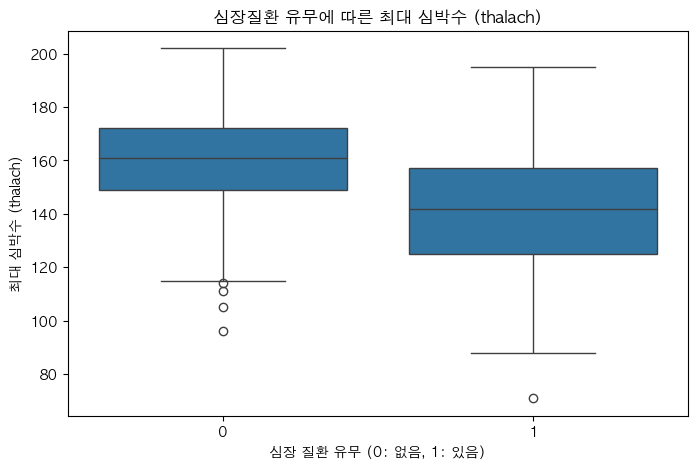

In [27]:
#최대심박수 vs 심장 질환 
plt.figure(figsize=(8,5))
sns.boxplot(x = 'condition', y = 'thalach', data = df)
plt.title('심장질환 유무에 따른 최대 심박수 (thalach)')
plt.xlabel('심장 질환 유무 (0: 없음, 1: 있음)')
plt.ylabel('최대 심박수 (thalach)')
plt.show()

## thalach
- 최대 심박수는 심장 기능의 민감한 지표이다. 
- thalach 는 심장의 운동 능력 평가로, 운동 중 도달한 최대 심박수를 말한다. 
- **너무 낮으면 심장 기능 약화 가능성이 있다.** 

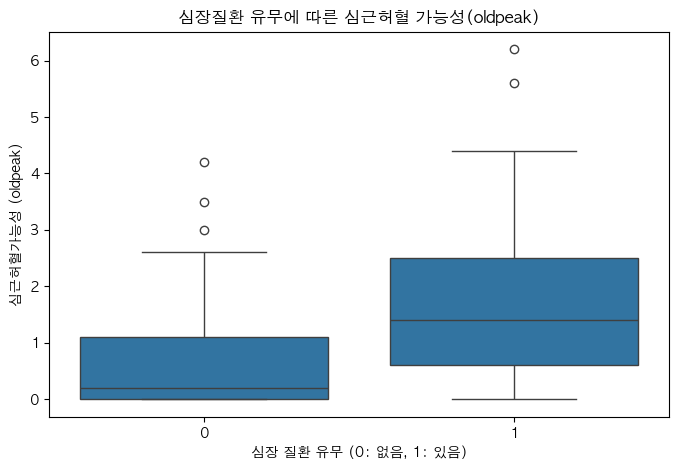

In [28]:
#ST depression(oldpeak) vs 심장 질환 
plt.figure(figsize=(8,5))
sns.boxplot(x = 'condition', y = 'oldpeak', data = df)
plt.title('심장질환 유무에 따른 심근허혈 가능성(oldpeak)')
plt.xlabel('심장 질환 유무 (0: 없음, 1: 있음)')
plt.ylabel('심근허혈가능성 (oldpeak)')
plt.show()

## oldpeak
- 운동 후 ST segment의 하강 정도
- 심근 허혈(심장 근육에 산소 공급 부족)을 의미하고 높을수록 위험하다.

In [29]:
print(df.cp.value_counts())

cp
3    142
2     83
1     49
0     23
Name: count, dtype: int64


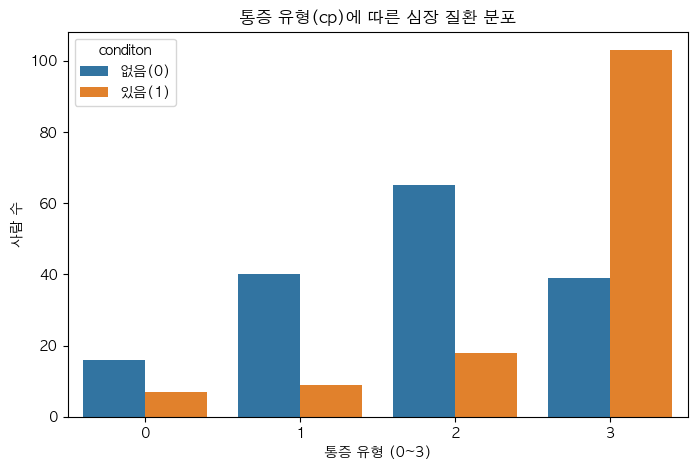

In [30]:
#통증유형(cp) vs 심장 질환 
#cp는 범주형 변수 -> countplot으로 시각화 
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='condition', data=df)
plt.title('통증 유형(cp)에 따른 심장 질환 분포')
plt.xlabel('통증 유형 (0~3)')
plt.ylabel('사람 수')
plt.legend(title='conditon', labels=['없음(0)', '있음(1)'])
plt.show()


### 📊 유의미한 변수 3개 및 의학적 인사이트

1. **oldpeak (ST depression)**  
   - **설명**: 운동 중 ST segment가 내려가는 정도. 심근 허혈(심장 근육에 산소 공급 부족)을 의미함.  
   - **인사이트**: 심장 질환 환자에서 `oldpeak`가 **명확히 높게 나타남**.

2. **thalach (최대 심박수)**  
   - **설명**: 운동 중 도달한 최대 심박수. 심장 기능의 반응성을 반영함.  
   - **인사이트**: 심장 질환 환자들은 최대 심박수(`thalach`)가 **상대적으로 낮음**.

3. **cp (흉통 유형)**  
   - **설명**: 흉통의 형태 (전형적/비전형적/비심장성/무통).  
   - **인사이트**: 3은 **심장 질환 비율이 뚜렷하게 높음**.


---
### 🚩 Q2. 전처리 및 스케일링
- 범주형 피처에 대해 One-Hot Encoding을 하되, **의미 없는 분산이 낮은 카테고리**는 제거하세요.
- 수치형 피처는 StandardScaler를 이용해 정규화하세요.

In [31]:
df.dtypes

#범주형 데이터 : sex, cp(흉통종류 0~3), fbs(공복혈당>120여부(0,1)), restecg(심전도 결과 0~2), exang(운동시 협심증 유발 여부 0~1), slope(ST segment 기울기(0~2)), thal(심장스캔결과(0~2)) 
#원 핫 인코딩 -> 카테고리가 2개 이상일 때 주로 사용
#원 핫 인코딩할 데이터 : cp, restecg, slope, thal

from sklearn.preprocessing import StandardScaler
#One-Hot Encoding
categorical_features = ['cp','restecg','slope','thal']
df = pd.get_dummies(df, columns = categorical_features, drop_first = True )

#스케일링
features = df.drop('condition', axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
y = df['condition']


---
### 🚩 Q3. 모델별 예측 비교
- SVC(probability=True), RandomForestClassifier, LogisticRegression을 학습시키고, 테스트 정확도, precision, recall을 비교하세요.
- 환자의 진단이 False Positive가 되었을 때, 어떤 모델이 가장 "안전한" 판단을 내리는지 해석하세요.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
#여러개의 모델을 한번에 훈련시키기 위해 모델 묶기
models = {
    'SVC' : SVC(probability=True),
    'LogReg' : LogisticRegression(max_iter= 1000),
    'RF': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} 모델 성능")
    print(classification_report(y_test, y_pred))

SVC 모델 성능
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        32
           1       0.65      0.79      0.71        28

    accuracy                           0.70        60
   macro avg       0.71      0.71      0.70        60
weighted avg       0.71      0.70      0.70        60

LogReg 모델 성능
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

RF 모델 성능
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.72      0.75      0.74        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.7

# ✅ 해설
- "환자 진단 문제" , False Positive인 상황에서는 정밀도(Precision)이 제일 중요함.
- 질병이 없는데 질병이 있다고 잘못 판단하는걸 줄이고 싶음. 

- 질병이 없을 때(0) : LogReg의 Precision 이 0.84로 제일 높음.
- 질병이 있을 때(1) : LogReg의 Precision 이 0.79로 제일 높음.

### 🎯결론 : 환자가 병이 없는데 병이라고 진단하는 위험을 가장 줄여줄 수 있는 건 `LogReg 모델`이다. 

---
### 🚩 Q4. 앙상블 모델과 의료 현장 적용
- Hard Voting, Soft Voting을 구성하고 성능을 비교하세요.
- Soft Voting의 확률 결과를 활용해 "이 환자의 심장병 확률은 X%입니다" 라고 설명하는 함수를 만드세요.

In [34]:
from sklearn.ensemble import VotingClassifier

# 하드 보팅
voting_hard = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True))
], voting='hard')

# 소프트 보팅
voting_soft = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True))
], voting='soft')

for clf, label in zip([voting_hard, voting_soft], ['Hard Voting', 'Soft Voting']):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"📌 {label} 결과:")
    print(classification_report(y_test, y_pred))

# 확률 출력 예시
voting_soft.fit(X_train, y_train)
sample_prob = voting_soft.predict_proba([X_test[0]])[0][1]
print(f"이 환자의 심장병 확률은 {sample_prob * 100:.2f}%입니다.")


📌 Hard Voting 결과:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.72      0.82      0.77        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

📌 Soft Voting 결과:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.72      0.82      0.77        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

이 환자의 심장병 확률은 90.18%입니다.


In [35]:
#샘플 여러개 확인해보기 
import pandas as pd

# 1. 소프트 보팅 모델 학습
voting_soft.fit(X_train, y_train)

# 2. 테스트 데이터 중 앞 5개 샘플 선택
samples = X_test[:5]

# 3. 각 샘플의 확률 예측
probs = voting_soft.predict_proba(samples)

# 4. 예측 결과를 테이블로 정리
proba_df = pd.DataFrame(probs, columns=['Class 0 심장병 없음 (정상)', 'Class 1 심장병 있음 (질병)'])

# 5. 출력
print(proba_df)


   Class 0 심장병 없음 (정상)  Class 1 심장병 있음 (질병)
0             0.128709             0.871291
1             0.196268             0.803732
2             0.692778             0.307222
3             0.991285             0.008715
4             0.245508             0.754492


In [36]:
# 최종 예측 레이블 추가
preds = voting_soft.predict(samples)
proba_df['최종 예측 결과'] = preds

print(proba_df)

   Class 0 심장병 없음 (정상)  Class 1 심장병 있음 (질병)  최종 예측 결과
0             0.128709             0.871291         1
1             0.196268             0.803732         1
2             0.692778             0.307222         0
3             0.991285             0.008715         0
4             0.245508             0.754492         1
